**Self Practice Exercises**

1)Load property dataset 2) Which type of hdb has the most entries in the dataset? 3) Display the total property_tax_collection for each financial year. 4) Generate the histogram charts. 5) Create a heatmap from sns for the function corr() on property dataset. Which is the most correlated pair of attributes? 6) Try sns.pairplot on property data. 7) Create 3 bins on no_of_cases (small : 0 to 10000, medium : 10001-100000, large : 100001-500000). 8) Generate the barchart on the newly created bins. 9) For each bin, display the average for the collected property tax.

**1) Load the data in the given file - property.csv.**

In [9]:
# Import csv library, which allows us to handle CSV files
import csv

# Import features that allow us to plot
import matplotlib.pyplot as plt
import seaborn as sns

# Import pandas library
import pandas as pd

# Read property dataset from CSV file
propertyDataset = pd.read_csv('property.csv')

# Show a summary of the first 5 rows of the dataset
propertyDataset.head()

,financial_year,type_of_hdb,no_of_cases,median_annual_value,property_tax_collection
0,2010,1 or 2 Room,8632,4500,190
1,2010,3 Room,213865,6300,16259
2,2010,4 Room,339721,8100,45089
3,2010,5 Room,209210,9000,37936
4,2010,Executive & Others,64613,9300,13046


**2) Which type of hdb has the most entries in the dataset?**

In [10]:
# For each possible unique value in the 'type_of_hdb' variable,
# count how often that value occurs
propertyDataset['type_of_hdb'].value_counts()

1 or 2 Room           8
3 Room                8
4 Room                8
5 Room                8
Executive & Others    8
Name: type_of_hdb, dtype: int64

**3) Display the total property_tax_collection for each financial year.**

In [11]:
# First, group records by 'financial_year'.
# Then, add up 'property_tax_collection' for each group.
propertyDataset.groupby('financial_year')['property_tax_collection'].sum()

financial_year
2010    112520
2011    104543
2012    144415
2013    150158
2014    140286
2015    134257
2016    122876
2017    117947
Name: property_tax_collection, dtype: int64

**4) Generate the histogram charts.**

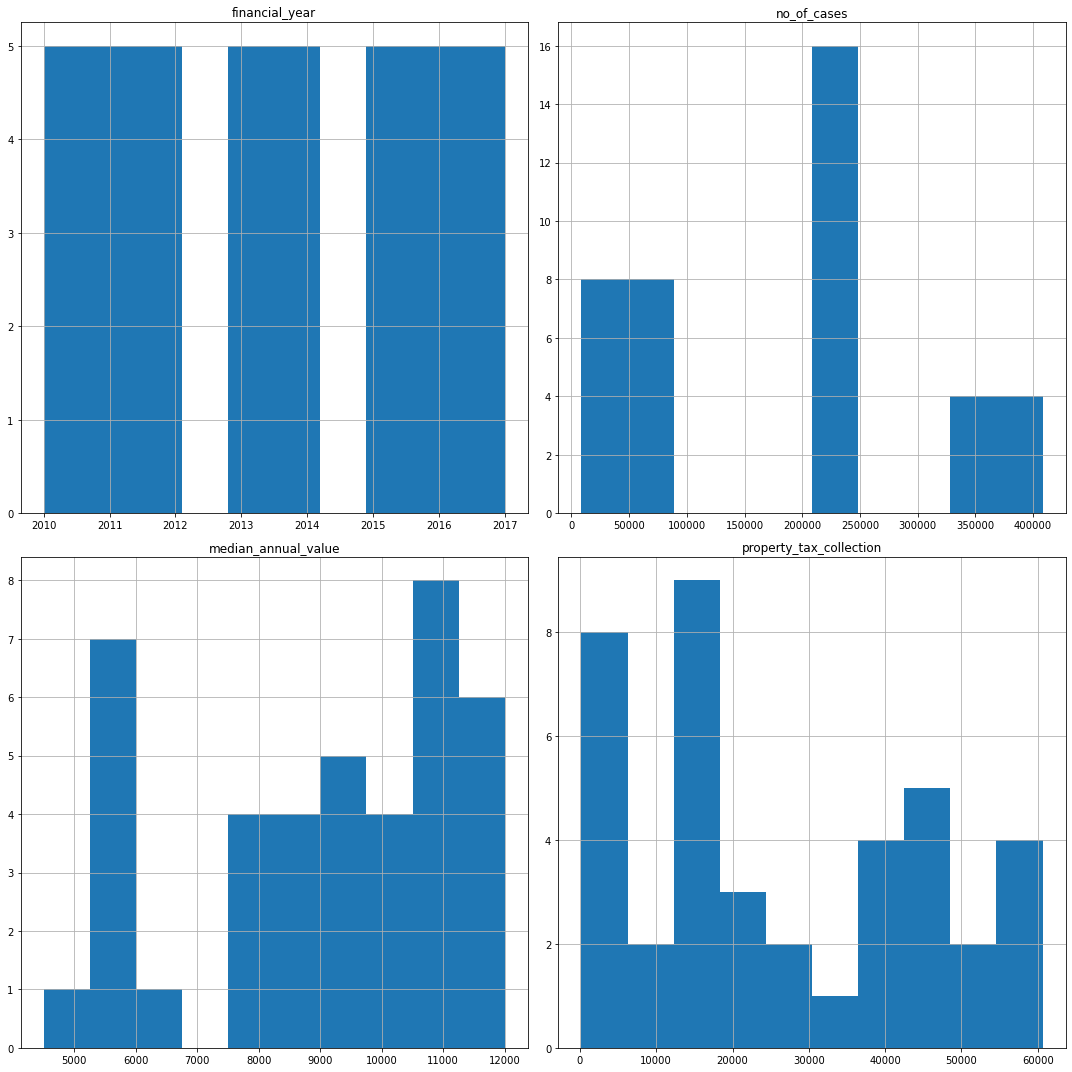

In [12]:
# Show histograms of all numeric variables in the dataset.
# "figsize" controls the size of the histogram.
propertyDataset.hist(figsize = (15,15))

# This just lays out the diagrams with more space in between
plt.tight_layout()

**5) Create a heatmap from sns for the function corr() on property dataset. Which is the most correlated pair of attributes?**


<AxesSubplot:>

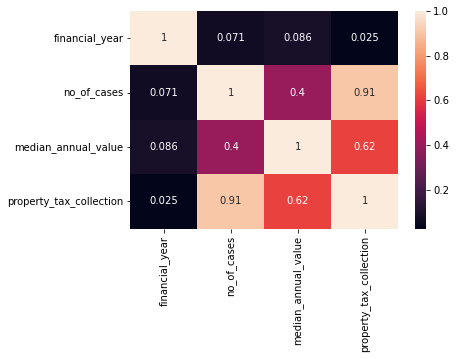

In [13]:
# Show correlation between variables as a heatmap instead
# (light colors means higher correlation,
# dark colors means lower correlation)
#sns.heatmap(propertyDataset.corr(), annot=True)

# Python 3.12
sns.heatmap(propertyDataset.corr(numeric_only=True), annot=True)

**6) Try sns.pairplot on property**

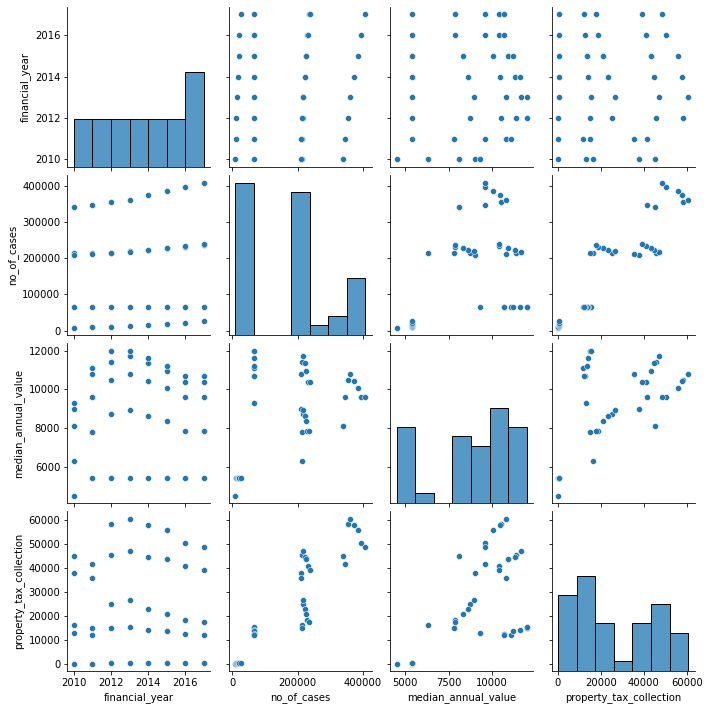

In [14]:
# This creates a separate plot for each pair of numeric variables.
# When a variable is plotted against itself, a histogram is shown instead.
sns.pairplot(propertyDataset)

**7) Create 3 bins on no_of_cases (small : 0 to 10000, medium : 10001-100000, large : 100001-500000).**

In [15]:
# Create a new categorical variable, using the 'no_of_cases' variable by splitting it up into bins
propertyDataset['no_cases_bins'] = pd.cut(propertyDataset['no_of_cases'], bins = [0, 10000, 100000, 500000], labels = ['small', 'medium', 'large'])
propertyDataset.head()

,financial_year,type_of_hdb,no_of_cases,median_annual_value,property_tax_collection,no_cases_bins
0,2010,1 or 2 Room,8632,4500,190,small
1,2010,3 Room,213865,6300,16259,large
2,2010,4 Room,339721,8100,45089,large
3,2010,5 Room,209210,9000,37936,large
4,2010,Executive & Others,64613,9300,13046,medium


**8) Generate the column chart on the newly created bins.**

C:\Users\jasonchan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_cases_bins', ylabel='count'>

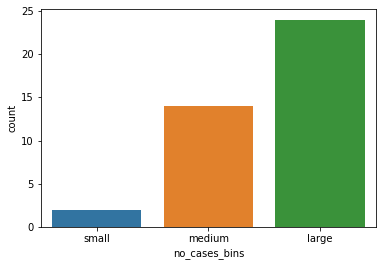

In [16]:
# Show histogram of agebins2
#sns.countplot(titanic['agebins2'])

# Python 3.12
sns.countplot(propertyDataset, x = 'no_cases_bins')

**9) For each bin, display the average for the collected property tax.**

In [17]:
# First, group by 'no_cases_bins'.
# Then, find the average values.
# Then, only show 'property_tax_collection' variable
propertyDataset.groupby('no_cases_bins').mean()['property_tax_collection']

no_cases_bins
small       216.000000
medium     7883.785714
large     38174.875000
Name: property_tax_collection, dtype: float64